In [1]:
import scanpy as sc 
import numpy

In [3]:
import sys
sys.path.insert(1, '/Users/kang/Dropbox/Code/ToppCell-Python/')
import ToppCell_Python as tp

### 1. load data

This PBMC dataset is from [Kang et al.2017](https://www.nature.com/articles/nbt.4042?report=reader), which includes two conditions (IFN stimulation and control) and six cell types. It can be downloaded from GSE96583.

In [5]:
output_dir = "/Users/kang/Dropbox/Code/data/toppcell_test/"
adata = sc.read("/Users/kang/Dropbox/Code/data/batch2_all_normalized_filtered.h5ad")

In [8]:
adata

AnnData object with n_obs × n_vars = 24673 × 35635
    obs: 'tsne1', 'tsne2', 'ind', 'stim', 'cluster', 'cell', 'multiplets'
    var: 'gene symbol'
    uns: 'log1p'

In [9]:
adata.obs.head()

,tsne1,tsne2,ind,stim,cluster,cell,multiplets
AAACATACATTTCC-1,-27.640373,14.966629,1016,ctrl,9,CD14+ Monocytes,singlet
AAACATACCAGAAA-1,-27.493646,28.924885,1256,ctrl,9,CD14+ Monocytes,singlet
AAACATACCATGCA-1,-10.468194,-5.984389,1488,ctrl,3,CD4 T cells,singlet
AAACATACCTCGCT-1,-24.367997,20.429285,1256,ctrl,9,CD14+ Monocytes,singlet
AAACATACCTGGTA-1,27.952170,24.159738,1039,ctrl,4,Dendritic cells,singlet


We select two cell annotations in metadata for ToppCell gene module generation: stimulation ("stim") and cell type ("cell").

### 2. create shred object

Create a shred object with shred plan.

In [10]:
shred = tp.Shred(adata = adata,
                shred_plan = ["stim", "cell", "stim+cell|stim"],
                bin_group = ["stim", "cell"],
                order_bins = None,
                order_modules = None,
                method = "wilcoxon")

In [11]:
# conduct differential expression based on the shred plan
df_DEG = shred.do_shredplan()

... storing 'bin_group' as categorical
... storing 'target_value' as categorical
... storing 'target_value' as categorical


### 3. generate heatmap

Create a heatmap that contains all gene modules from the shred plan.

In [12]:
df_heatmap, df_genemodule = shred.create_heatmap_matrix()
# output file
# df_heatmap.to_csv(path + "heatmap_matrix.txt", sep = "\t")
# df_genemodule.to_csv(path + "heatmap_geneModules.txt", sep = "\t")
# df_bin_metadata = shred.bin_metadata

/Users/kang/Dropbox/Code/ToppCell-Python/ToppCell_Python/_visualize.py:86: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(columns, rotation = 45)


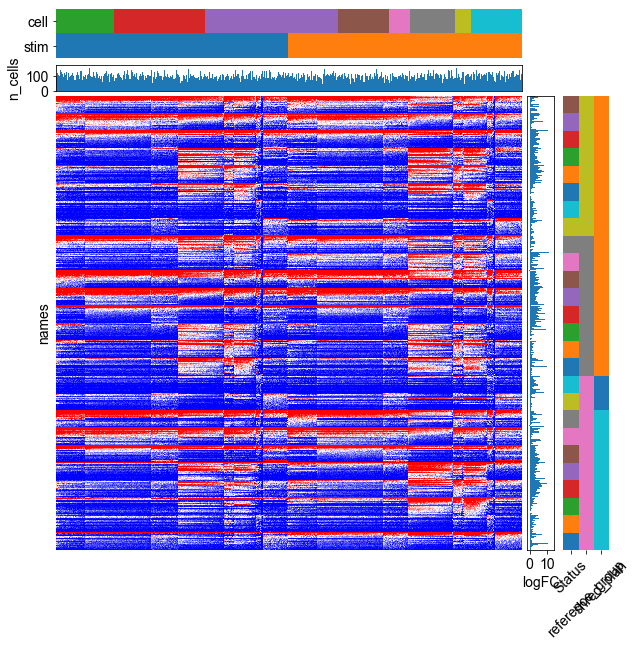

In [13]:
# draw heatmap for these gene modules.
shred.draw_heatmap(output_name = path + "heatmap.png")

### 4. do enrichment for all modules and draw ToppCluster map

In [14]:
df_module_enrichment = shred.enrich_modules(categories = ["GeneOntologyCellularComponent"])
df_module_enrichment.head()

/Users/kang/Dropbox/Code/ToppCell-Python/ToppCell_Python/_shred.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genelist["genes"] = df_genelist.index.values # reformat the table


SSLError: HTTPSConnectionPool(host='maayanlab.cloud', port=443): Max retries exceeded with url: /Enrichr/datasetStatistics (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1091)')))

In [ ]:
df_toppcluster_modulemap = shred.toppcluster()

/Users/kang/miniconda3/envs/aipy/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


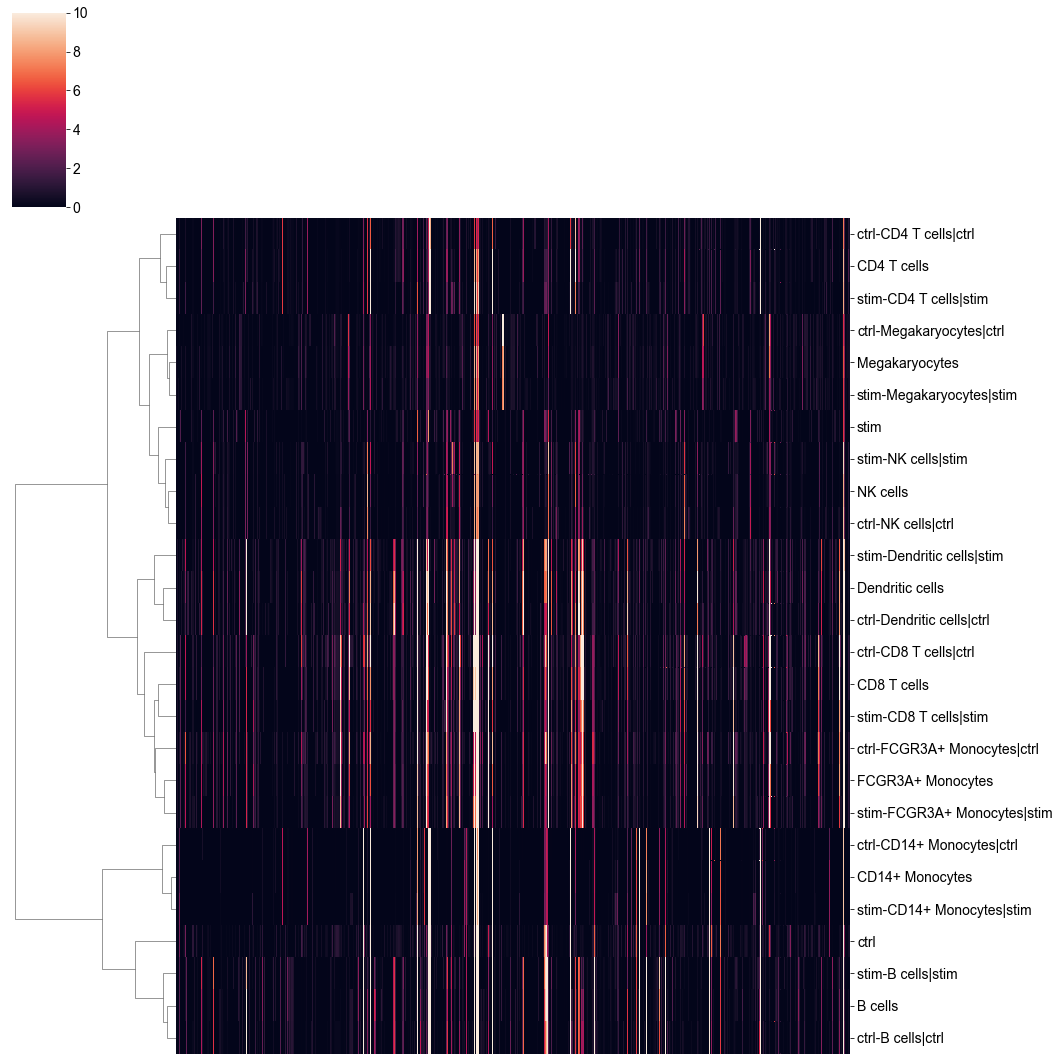

In [50]:
sns.clustermap(df_toppcluster, vmin = 0, vmax = 10, col_cluster = False,
               figsize=(15,15), xticklabels = False, yticklabels = True)

In [49]:
?sns.clustermap